# Import dependencies

In [37]:
import keypoint_moseq as kpms
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Calculate the syllables

In [163]:
project_dir= r'D:\Barrier_testing_day1_videos' # the full path to the project directory
model_name='2025_05_29-18_08_08' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

In [164]:
kpms.interactive_group_setting(project_dir, model_name)

BokehModel(combine_events=True, render_bundle={'docs_json': {'130e8493-81c8-48f6-8ac4-91fea769715a': {'version…

In [165]:
kpms.compute_moseq_df(project_dir, model_name)

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.752607,651.839085,-1.626624,0.000000,0.000000,0,0,Control_10cm,True
1,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.829276,651.254640,-1.626783,-0.107229,17.683563,0,1,Control_10cm,False
2,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.998691,650.385497,-1.626972,-0.206063,36.065952,0,2,Control_10cm,False
3,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.694442,649.854477,-1.627049,-0.285877,26.257310,0,3,Control_10cm,False
4,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.967617,649.238481,-1.670152,-0.334553,28.582420,0,4,Control_10cm,False
...,...,...,...,...,...,...,...,...,...,...
49642,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,693.388156,277.445654,-0.720470,1.107921,147.573100,3,82,Control_20cm,False
49643,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.833964,274.922962,-0.705956,0.938828,87.229049,3,83,Control_20cm,False
49644,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.639558,271.201725,-0.646499,0.735292,111.789325,3,84,Control_20cm,False
49645,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.536243,268.388532,-0.646499,0.504570,84.452685,3,85,Control_20cm,False


In [42]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True) 
moseq_df

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.752607,651.839085,-1.626624,0.000000,0.000000,0,0,Control_10cm,True
1,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.829276,651.254640,-1.626783,-0.107229,17.683563,0,1,Control_10cm,False
2,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.998691,650.385497,-1.626972,-0.206063,36.065952,0,2,Control_10cm,False
3,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,695.694442,649.854477,-1.627049,-0.285877,26.257310,0,3,Control_10cm,False
4,031524_Barrier_Testing_10cm_Day_1_WT027MContro...,694.967617,649.238481,-1.670152,-0.334553,28.582420,0,4,Control_10cm,False
...,...,...,...,...,...,...,...,...,...,...
49642,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,693.388156,277.445654,-0.720470,1.107921,147.573100,3,82,Control_20cm,False
49643,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.833964,274.922962,-0.705956,0.938828,87.229049,3,83,Control_20cm,False
49644,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.639558,271.201725,-0.646499,0.735292,111.789325,3,84,Control_20cm,False
49645,07022024_Barrier_Testing_20cm_Day1_WT061FContr...,694.536243,268.388532,-0.646499,0.504570,84.452685,3,85,Control_20cm,False


In [43]:
moseq_df = moseq_df[~moseq_df['syllable'].isin(range(8, 14))]


In [44]:
# Split the 'group' column into 'condition' and 'experiment' based on the underscore
moseq_df[['condition', 'experiment']] = moseq_df['group'].str.split('_', expand=True)

# Drop the original 'group' column
moseq_df = moseq_df.drop(columns=['group'])

# Verify the changes
print(moseq_df[['condition', 'experiment']].head())

  condition experiment
0   Control       10cm
1   Control       10cm
2   Control       10cm
3   Control       10cm
4   Control       10cm


C:\Users\Jillian.Sucher\AppData\Local\Temp\ipykernel_28824\1109664735.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jillian.Sucher\AppData\Local\Temp\ipykernel_28824\1109664735.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
import re

# Function to extract subject ID (e.g., wt123)
def extract_subject(name):
    match = re.search(r'(wt\d+)', name, re.IGNORECASE)
    return match.group(1) if match else None

# Function to extract trial number (number before "DLC")
def extract_trial(name):
    match = re.search(r'(\d+)[^\d]*DLC', name, re.IGNORECASE)
    return int(match.group(1)) if match else None

# Apply both extractions
moseq_df['subject'] = moseq_df['name'].apply(extract_subject)
moseq_df['trial'] = moseq_df['name'].apply(extract_trial)

# Create analysis_df with selected columns
analysis_df = moseq_df[['subject', 'condition', 'experiment', 'trial', 'syllable']].dropna()


In [146]:
from PIL import Image, ImageSequence

# Load the GIF
gif_path = r'D:\Barrier_testing_day1_videos\2025_05_29-18_08_08\trajectory_plots\all_trajectories.gif'
gif = Image.open(gif_path)

# Get the last frame
frames = [frame.copy() for frame in ImageSequence.Iterator(gif)]
last_frame = frames[-1]

# Optional: convert to RGB (PDFs don't support transparency)
last_frame = last_frame.convert("RGB")

# Save as PDF
last_frame.save(r'D:\Figures\trajectory_last_frame.pdf', "PDF")


# Syllable frequency

In [48]:
# Step 1: Count how many times each subject used each syllable in each experiment
syllable_counts = analysis_df.groupby(['subject', 'experiment', 'syllable']).size().reset_index(name='count')

# Step 2: Total number of syllables per subject per experiment
total_counts = analysis_df.groupby(['subject', 'experiment']).size().reset_index(name='total')

# Step 3: Merge and compute ratio
merged = pd.merge(syllable_counts, total_counts, on=['subject', 'experiment'])
merged['ratio'] = merged['count'] / merged['total']

# Step 4: Merge condition info (assumed constant per subject per experiment)
subject_info = analysis_df[['subject', 'experiment', 'condition']].drop_duplicates()
new_analysis_df = pd.merge(merged, subject_info, on=['subject', 'experiment'])

# Step 5: Keep only required columns
new_analysis_df = new_analysis_df[['syllable', 'subject', 'condition', 'experiment', 'ratio']]


In [50]:
# Export to CSV
merged.to_csv("merged.csv", index=False)


T-TEST RESULTS:

Experiment: 10cm, Syllable: 0
  t = -2.364, raw p = 0.0282, Bonferroni p = 0.6778, df = 28
  Control (n=14): mean = 0.059, std = 0.034
  CNSDS   (n=16): mean = 0.083, std = 0.019

Experiment: 10cm, Syllable: 1
  t = 4.190, raw p = 0.0005, Bonferroni p = 0.0115, df = 28
  Control (n=14): mean = 0.175, std = 0.066
  CNSDS   (n=16): mean = 0.092, std = 0.036

Experiment: 10cm, Syllable: 2
  t = -4.017, raw p = 0.0006, Bonferroni p = 0.0145, df = 28
  Control (n=14): mean = 0.024, std = 0.019
  CNSDS   (n=16): mean = 0.070, std = 0.041

Experiment: 10cm, Syllable: 3
  t = 1.836, raw p = 0.0804, Bonferroni p = 1.0000, df = 28
  Control (n=14): mean = 0.118, std = 0.046
  CNSDS   (n=16): mean = 0.091, std = 0.029

Experiment: 10cm, Syllable: 4
  t = 0.839, raw p = 0.4088, Bonferroni p = 1.0000, df = 28
  Control (n=14): mean = 0.552, std = 0.126
  CNSDS   (n=16): mean = 0.512, std = 0.136

Experiment: 10cm, Syllable: 5
  t = -0.264, raw p = 0.7935, Bonferroni p = 1.0000, df

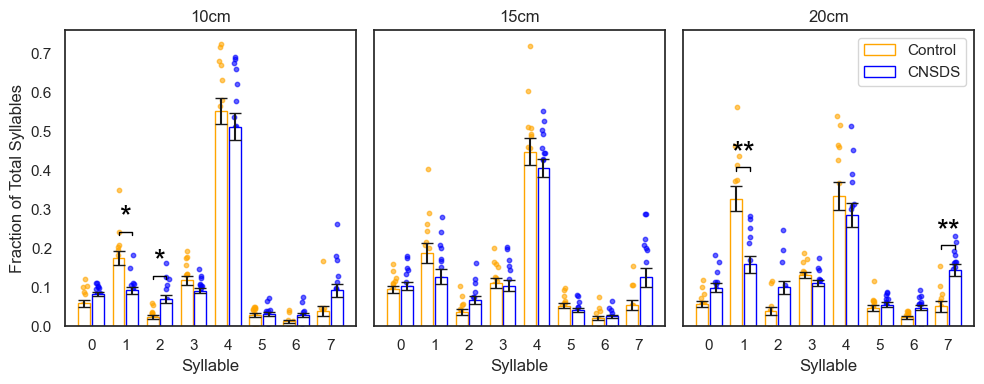

In [66]:
sns.set(style="white")

# Define colors
colors = {'Control': 'orange', 'CNSDS': 'blue'}

# Create subplots for each experiment
experiments = new_analysis_df['experiment'].unique()
n_experiments = len(experiments)
fig, axes = plt.subplots(1, n_experiments, figsize=(10, 4), sharey=True)

# Ensure axes is iterable
if n_experiments == 1:
    axes = [axes]

print("\nT-TEST RESULTS:\n")

# Count total number of comparisons (syllables × experiments)
total_tests = sum(
    len(new_analysis_df[new_analysis_df['experiment'] == exp]['syllable'].unique())
    for exp in experiments
)

for i, exp in enumerate(experiments):
    ax = axes[i]
    exp_data = new_analysis_df[new_analysis_df['experiment'] == exp]
    syllables = sorted(exp_data['syllable'].unique())

    for syll in syllables:
        syll_data = exp_data[exp_data['syllable'] == syll]

        means = {}
        sems = {}

        for cond in ['Control', 'CNSDS']:
            cond_data = syll_data[syll_data['condition'] == cond]['ratio']
            x_vals = np.random.normal(
                loc=syll + (-0.2 if cond == 'Control' else 0.2),
                scale=0.03,
                size=len(cond_data)
            )

            # Plot individual data points
            ax.scatter(x_vals, cond_data, color=colors[cond], alpha=0.6, s=10)

            # Store mean & SEM for annotation later
            means[cond] = cond_data.mean()
            sems[cond] = cond_data.sem()

            # Plot mean ± SEM as a bar
            ax.bar(
                syll + (-0.2 if cond == 'Control' else 0.2),
                means[cond],
                yerr=sems[cond],
                width=0.35,
                facecolor='white',
                edgecolor=colors[cond],
                capsize=4,
                label=cond if syll == syllables[0] else None
            )

        # T-test
        control_vals = syll_data[syll_data['condition'] == 'Control']['ratio']
        cnsds_vals = syll_data[syll_data['condition'] == 'CNSDS']['ratio']

        if len(control_vals) > 1 and len(cnsds_vals) > 1:
            t_stat, p_val = ttest_ind(control_vals, cnsds_vals, equal_var=False)
            p_bonf = min(p_val * total_tests, 1.0)
            df = len(control_vals) + len(cnsds_vals) - 2

            # Print t-test results
            print(f"Experiment: {exp}, Syllable: {syll}")
            print(f"  t = {t_stat:.3f}, raw p = {p_val:.4f}, Bonferroni p = {p_bonf:.4f}, df = {df}")
            print(f"  Control (n={len(control_vals)}): mean = {control_vals.mean():.3f}, std = {control_vals.std():.3f}")
            print(f"  CNSDS   (n={len(cnsds_vals)}): mean = {cnsds_vals.mean():.3f}, std = {cnsds_vals.std():.3f}\n")

            # Annotate significance with asterisks
            if p_bonf < 0.05:
                x1, x2 = syll - 0.2, syll + 0.2
                max_y = max(means['Control'] + sems['Control'], means['CNSDS'] + sems['CNSDS']) + 0.05

                # Plot line
                ax.plot([x1, x1, x2, x2], [max_y - 0.01, max_y, max_y, max_y - 0.01], color='black', linewidth=1)

                # Choose significance level
                if p_bonf < 0.001:
                    star = '***'
                elif p_bonf < 0.01:
                    star = '**'
                else:
                    star = '*'

                # Plot asterisk
                ax.text((x1 + x2) / 2, max_y - 0.005, star, ha='center', va='bottom', color='black', fontsize=22)
        else:
            print(f"Experiment: {exp}, Syllable: {syll} — Not enough data for t-test\n")

    ax.set_title(f"{exp}")
    ax.set_xlabel("Syllable")
    ax.set_xticks(syllables)
    if i == 0:
        ax.set_ylabel("Fraction of Total Syllables")

plt.tight_layout()
plt.legend()
plt.savefig("syllable_frequency.pdf", format="pdf")
plt.show()


In [54]:
# Export to CSV
new_analysis_df.to_csv("new_analysis_df.csv", index=False)


In [70]:
pts = pd.read_csv("pts.csv")

# Syllable location

C:\Users\Jillian.Sucher\AppData\Local\Temp\ipykernel_28824\2117630254.py:76: UserWarning:

This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.



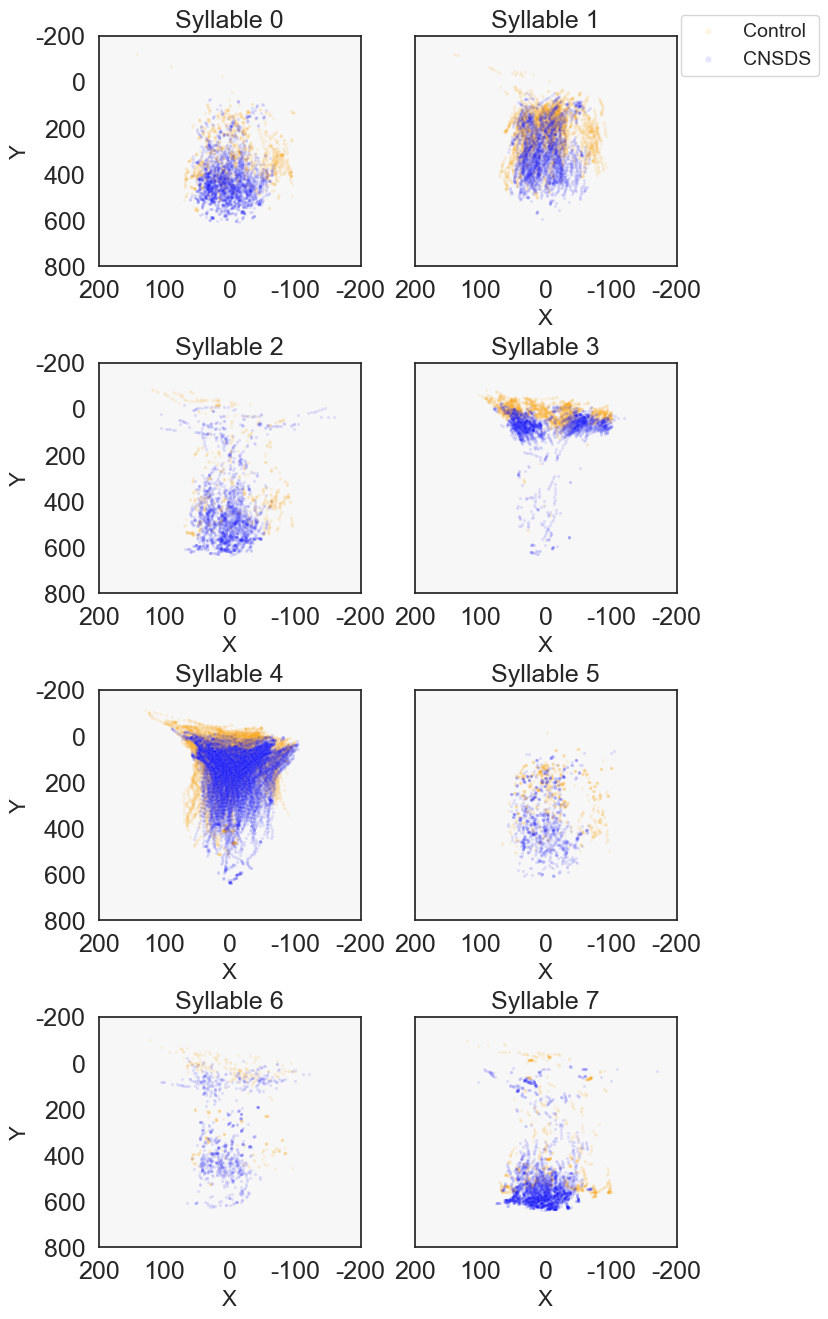

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique syllables
syllables = sorted(moseq_df['syllable'].unique())
n_syllables = len(syllables)

# Define rows and columns for subplots
nrows, ncols = 7, 2  # Adjust if needed
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7, 20), sharex=True, sharey=True, constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Define condition colors
condition_colors = {
    'Control': 'orange',
    'CNSDS': 'blue'
}

for i, syllable in enumerate(syllables):
    ax = axes[i]
    syllable_df = moseq_df[moseq_df['syllable'] == syllable].copy()

    # Flip coordinates
    syllable_df['centroid_x'] = 1500 - syllable_df['centroid_x']
    syllable_df['centroid_y'] = 1250 - syllable_df['centroid_y']

    # Plot each condition separately
    for condition, color in condition_colors.items():
        condition_df = syllable_df[syllable_df['condition'] == condition]
        sns.scatterplot(
            x='centroid_x',
            y='centroid_y',
            data=condition_df,
            ax=ax,
            color=color,
            s=5,
            alpha=.1,
            label=condition if i == 0 else None,  # Only add label in first subplot
            legend=False  # Prevent individual legends on subplots
        )

    ax.set_title(f'Syllable {syllable}', fontsize=18)
    # Custom x-tick relabeling: 600–1000 → -200 to 200
    xticks = np.linspace(600, 1000, 5)  # e.g., [600, 700, 800, 900, 1000]
    xlabels = xlabels = 200 - ((xticks - 600) * (400 / 400))  # Linear map to -200–200

    ax.set_xticks(xticks)
    ax.set_xticklabels([str(int(x)) for x in xlabels])

    ax.set_ylim(0, 1250)

    # Create custom y-ticks (choose spacing as needed)
    yticks = np.linspace(0, 1250, 6)  # e.g., [0, 250, 500, 750, 1000, 1250]
    ylabels = 800 - (yticks * (1000 / 1250))  # Map 0–1250 to 800–(-200)

    ax.set_yticks(yticks)
    ax.set_yticklabels([str(int(y)) for y in ylabels])

    ax.set_xlabel('X', fontsize=16)
    ax.set_ylabel('Y', fontsize=16)
    ax.set_facecolor('#f7f7f7')
    
    #ax.tick_params(labelsize=18)
    for ax in axes:
        ax.tick_params(axis='x', which='both', labelbottom=True)  # Force x ticks on
        ax.tick_params(labelsize=18)
        ax.tick_params(axis='x', labelbottom=True)

# Hide any unused axes
for j in range(len(syllables), len(axes)):
    fig.delaxes(axes[j])

# Adjust the subplot area to leave space on the right for the legend
fig.subplots_adjust(right=0.8)  # 80% width for plots, 20% for legend

# Create a single legend outside the plot area on the right
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(.95, 1), fontsize=14, title_fontsize=16, markerscale=2)

# Save the figure with bbox_inches='tight' to avoid clipping
plt.savefig("D:/Figures/syllable_locations_by_condition.png", format="png", bbox_inches='tight')

plt.show()
